# Практика по Conv2D

In [1]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
from tensorflow.keras.layers import Conv2D
from skimage import data
import matplotlib.pyplot as plt

2024-05-02 21:02:32.519909: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 21:02:33.396906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(1, 512, 512, 1)


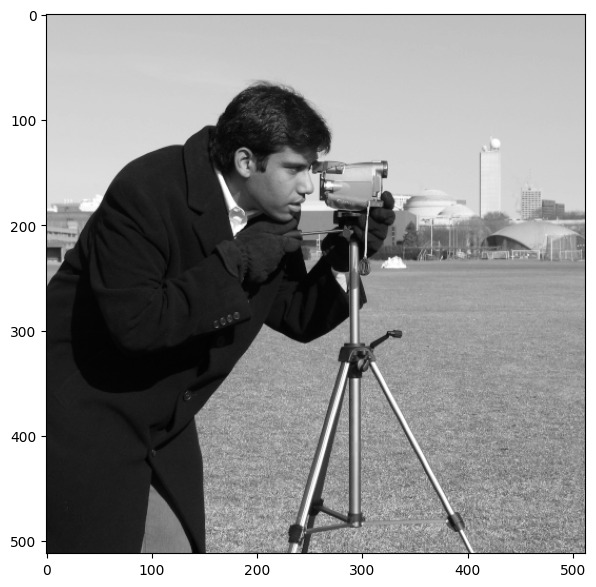

In [2]:
image = data.camera()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap="gray")
image = image[None, ..., None].astype(np.float32) / 255.
print(image.shape)

## Практическое задание 1

Реализуйте фильтр для детектирования вертикальных линий. Размер изображения не должен измениться.

(3, 3, 1, 1)
(3, 3, 1, 1)
Input shape (1, 512, 512, 1). Output shape (1, 512, 512, 1)
Tests passed


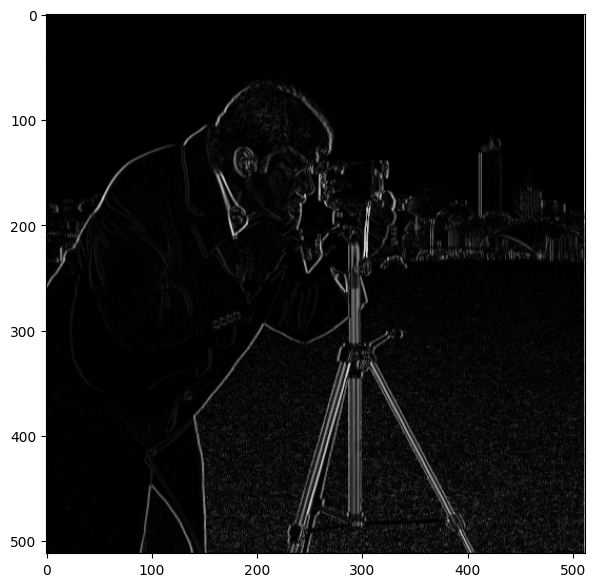

In [15]:
# < YOUR CODE STARTS HERE >
# 1. определите слой conv_layer так чтобы размер выходного изображения не изменился
# 2. примените его к image для инициализации
# 3. определите kernel = [[1, 0, -1], [2, 0, -2], [1, 0, -1]] .
# 4. не забудьте задать ему правильный размер
# 5. conv_layer.set_weights([kernel])
# После этого вы получите изображение с задетектированными линиями

conv_layer = Conv2D(kernel_size=(3, 3), filters=1, use_bias=False, padding="same")

_ = conv_layer(image)

kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
kernel = kernel.reshape((3, 3, 1, 1)).astype(np.float32)

print(conv_layer.get_weights()[0].shape)
print(kernel.shape)
conv_layer.set_weights([kernel])


# < YOUR CODE ENDS HERE >
detected_lines = conv_layer(image)
plt.figure(figsize=(7, 7))
plt.imshow(np.abs(detected_lines.numpy()[0, :,:, 0]), cmap="gray")
print(f"Input shape {image.shape}. Output shape {conv_layer(image).numpy().shape}")
assert image.shape  == detected_lines.shape
print("Tests passed")

## Практическое задание 2

Реализуйте свертку, которая повысит резкость цветного изображения и не изменит его размер.

Это делается с помощью такого фильтра:



```
[[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]]
```



(1, 400, 600, 3)


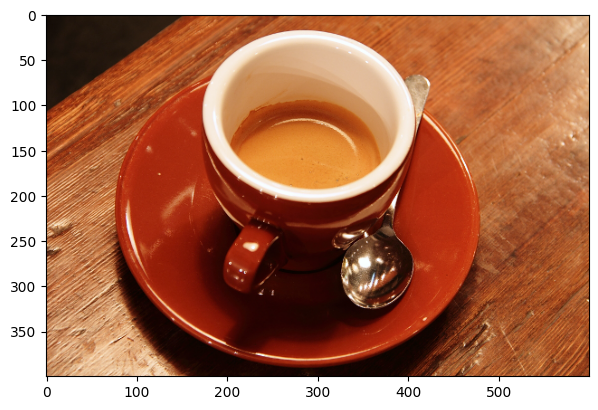

In [16]:
image = data.coffee()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap="gray")
image = image[None, ...].astype(np.float32) / 255.
print(image.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape (1, 400, 600, 3). Output shape (1, 400, 600, 3)
Tests passed


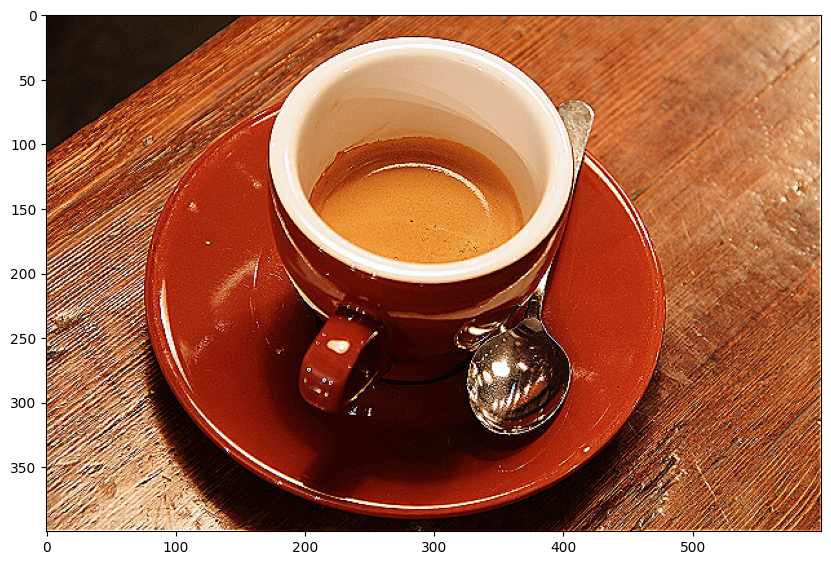

In [17]:
# < YOUR CODE STARTS HERE >
# 1. определите слой conv_layer так чтобы размер выходного изображения не изменился
# 2. примените его к image для инициализации
# 3. определите sharpen_kernel_2d= [[0, -1, 0],
#                                   [-1, 5, -1],
#                                   [0, -1, 0]]
# 4. По аналогии с размытием  цветного изображения сделайте так, чтобы этот фильтр
#    применился к каждом каналу независимо определив переменную kernel размера (3,3,3,3). Там должно быть много нулей
# 5. conv_layer.set_weights([kernel])
# После этого вы получите изображение повышенной резкостью


conv_layer = Conv2D(kernel_size=(3, 3), filters=3, use_bias=False, padding="same")

_ = conv_layer(image)

kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

sharpen_kernel_2d = np.zeros((3, 3, 3, 3))
sharpen_kernel_2d[:, :, 0, 0] = kernel
sharpen_kernel_2d[:, :, 1, 1] = kernel
sharpen_kernel_2d[:, :, 2, 2] = kernel

conv_layer.set_weights([sharpen_kernel_2d])

# < YOUR CODE ENDS HERE >
sharpen_image = conv_layer(image).numpy()
plt.figure(figsize=(10, 10))
plt.imshow(sharpen_image[0])
print(f"Input shape {image.shape}. Output shape {sharpen_image.shape}")
assert image.shape  == sharpen_image.shape
print("Tests passed")